### Import libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
house_df = pd.read_csv("kc_house_data.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [3]:
house_df.shape

(21613, 21)

#### Check for missing or null values in the data set

In [4]:
house_df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

#### From the below output, some of the columns are with the wrong data types. For example, the date column is of the type object, floors and bathrooms are of the type float64. Also, the id column can be used as the row index and I do suspect that the year in which the house was built will affect the house price.

In [5]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

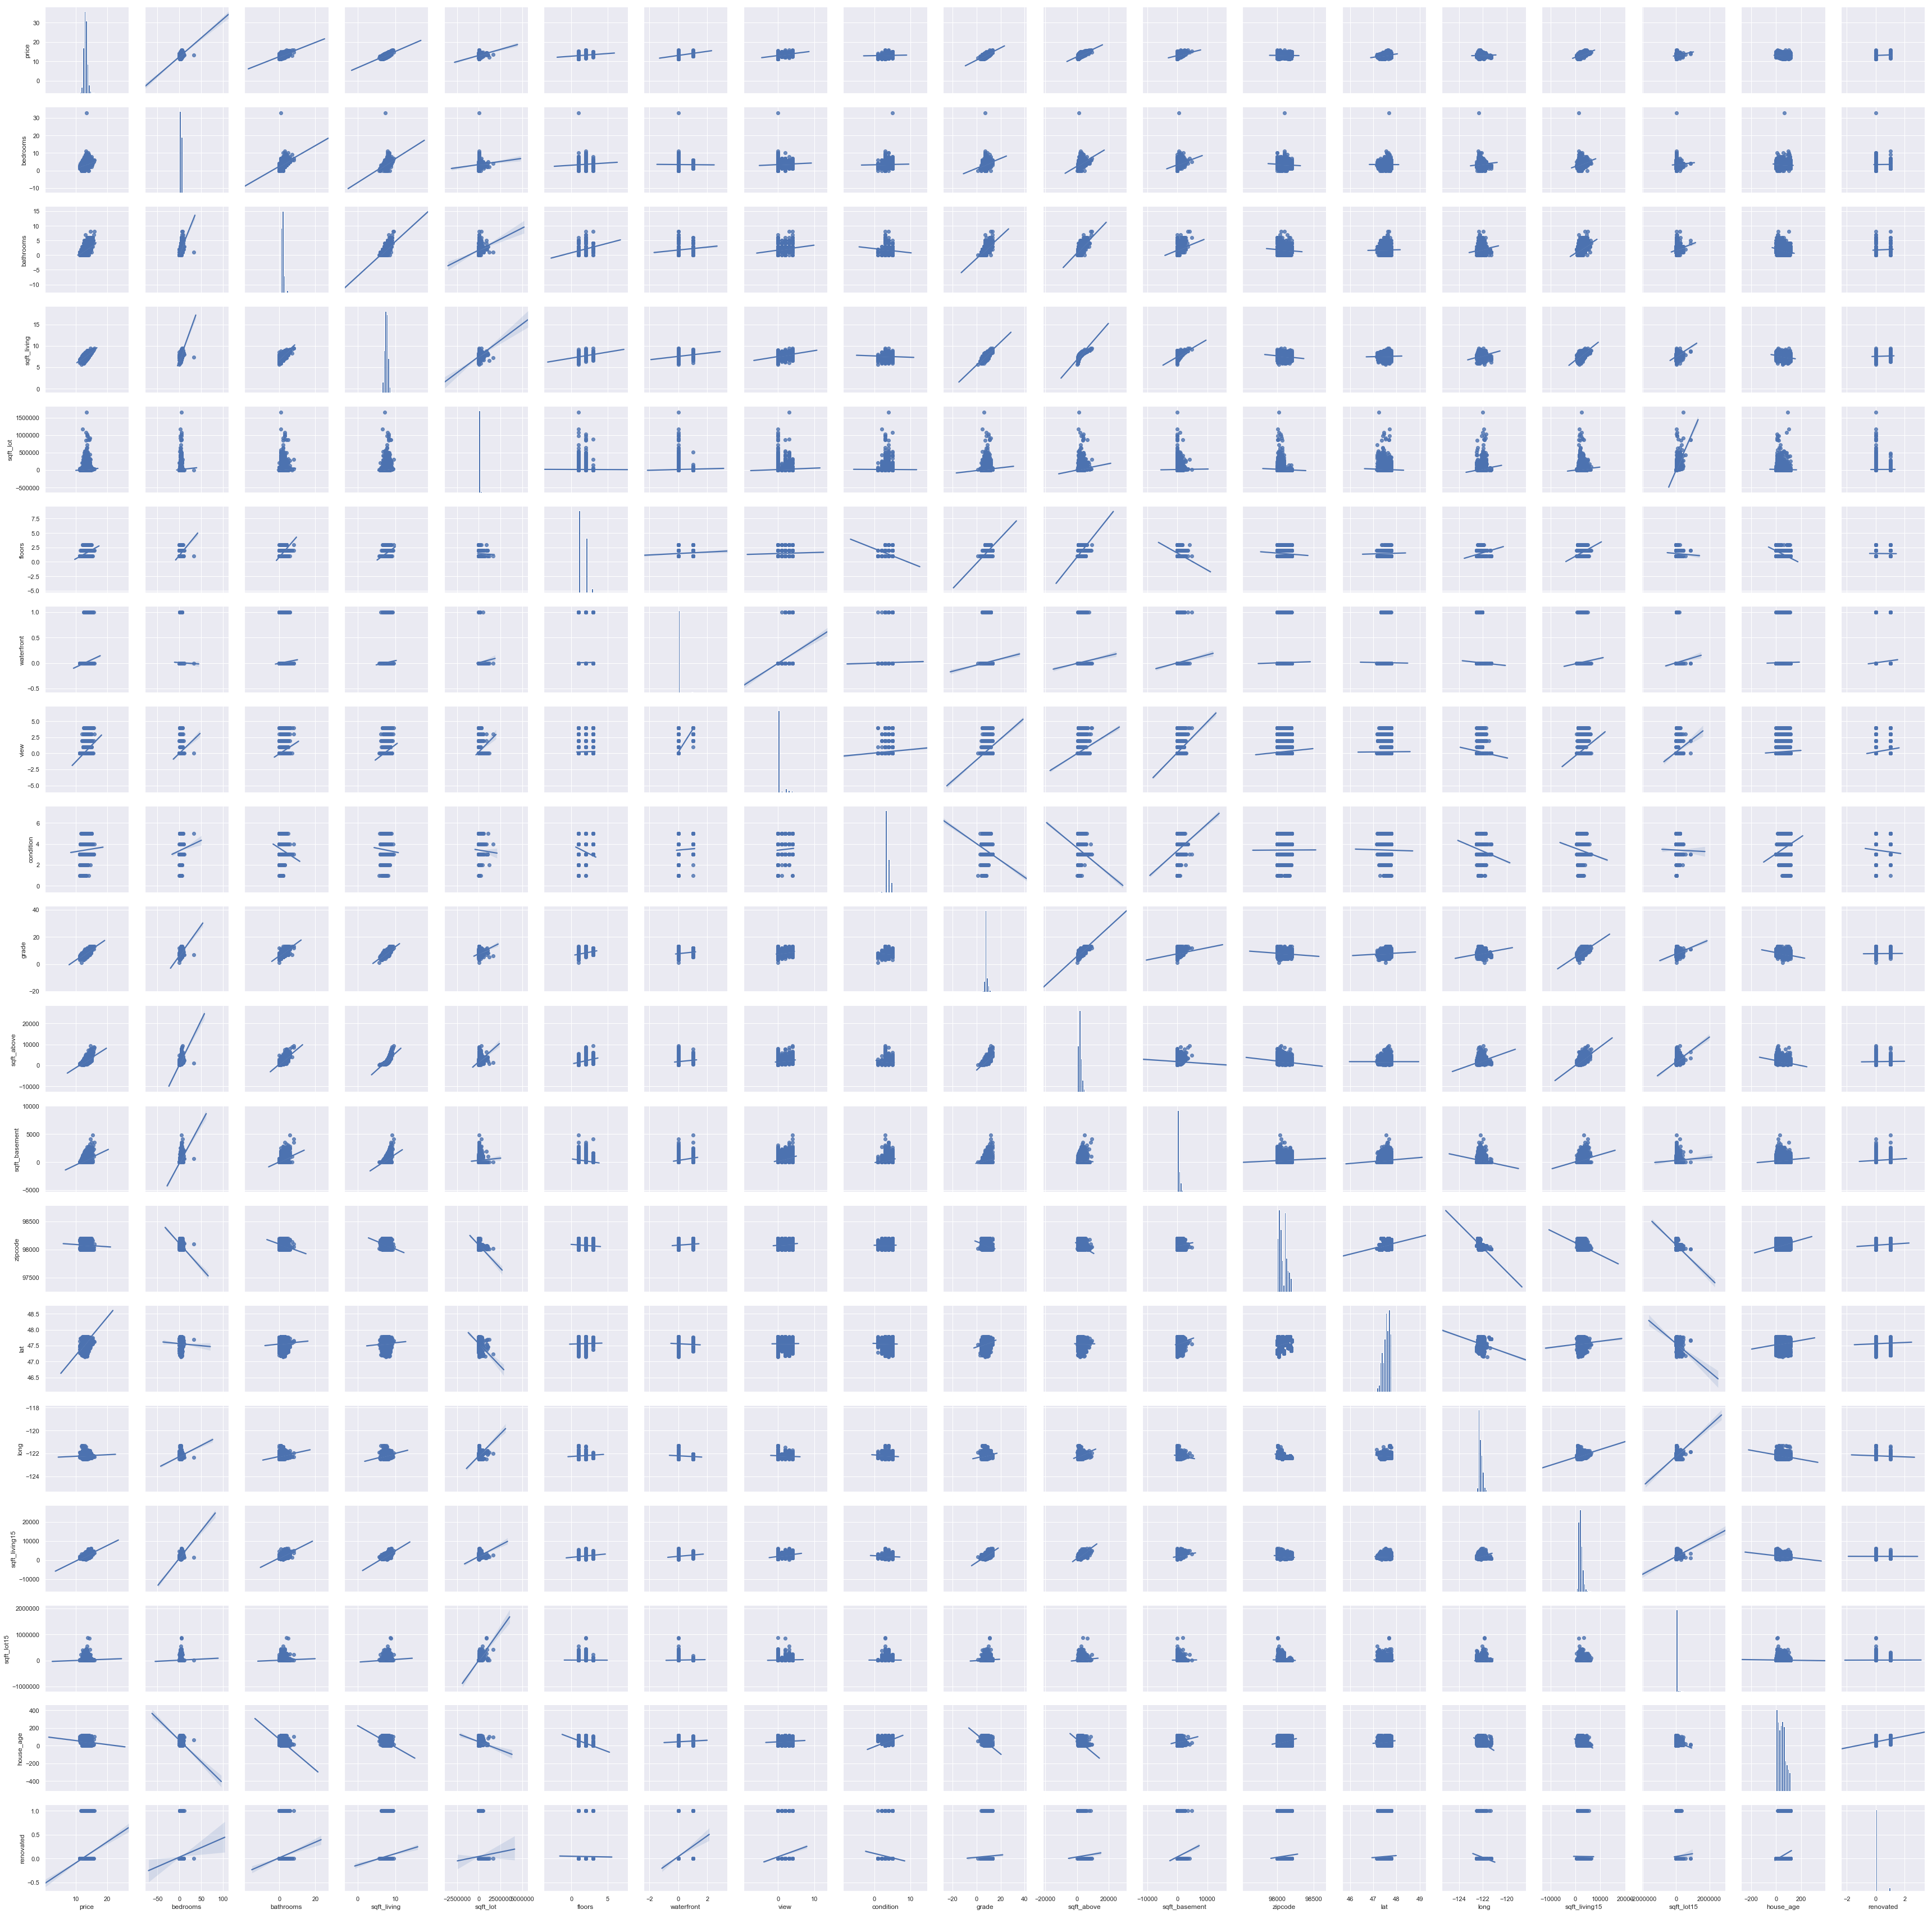

In [35]:
sns.pairplot(house_df, kind='reg')

#### Which is the most common house (Bedroom wise) ?

#### Let’s see which is most common bedroom number. You may wonder why is it important ? Let’s look at this problem from a builder’s perspective, sometimes it’s important for a builder to see which is the highest selling house type which enables the builder to make house based on that. Here in India, for a good locality a builder opts to make houses which are more than 3 bedrooms which attracts the higher middle class and upper class section of the society. Let’s see how this pans out for this data ?

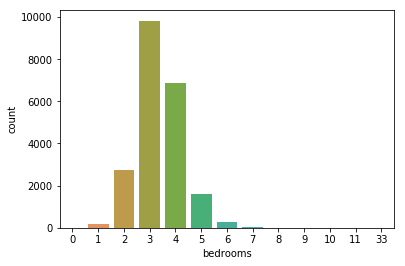

In [7]:
sns.countplot(house_df['bedrooms'])

#### As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data, He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

#### So now we know that 3 and 4 bedroom’s are highest selling. But at which locality ?

#### Visualizing the location of the houses based on latitude and longitude.

#### So according to the dataset, we have latitude and longitude on the dataset for each house. We are going to see the common location and how the houses are placed.

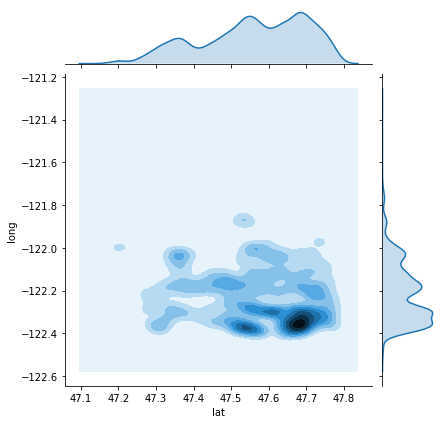

In [8]:
sns.jointplot(house_df['lat'], house_df['long'], kind="kde")

#### Let us see what we can infer from this visualization. For latitude between 47.6 and 47.8 there are many houses, which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the houses have been bought in this particular location.

#### How common factors are affecting the price of the houses ?

#### We saw the common locations and now we’re going to see few common factors affecting the prices of the house and if so, then by how much ?

#### Let us start with, If price is getting affecting by living area of the house or not ?

Text(0.5, 1.0, 'Price vs Square Feet')

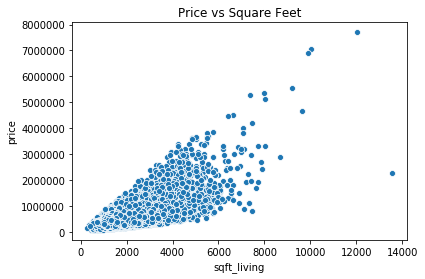

In [9]:
ax = sns.scatterplot(x="sqft_living", y="price", data=house_df)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs overall grade given to the housing unit, based on King County grading system')

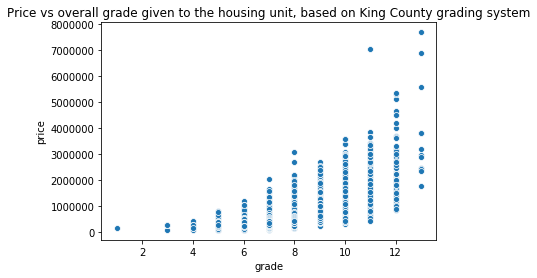

In [10]:
ax = sns.scatterplot(x="grade", y="price", data=house_df)
plt.title("Price vs overall grade given to the housing unit, based on King County grading system")

Text(0.5, 1.0, 'Price vs Location')

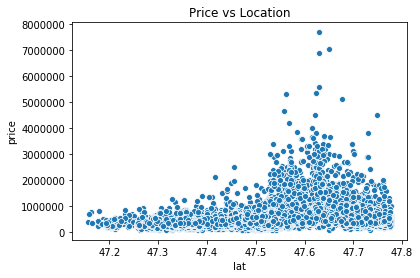

In [11]:
ax = sns.scatterplot(x="lat", y="price", data=house_df)
plt.title("Price vs Location")

Text(0.5, 1.0, 'Price vs Bedrooms')

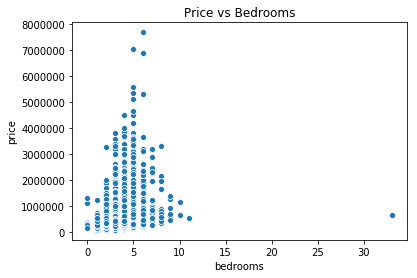

In [12]:
ax = sns.scatterplot(x="bedrooms", y="price", data=house_df)
plt.title("Price vs Bedrooms")

Text(0.5, 1.0, 'Price vs Bathrooms')

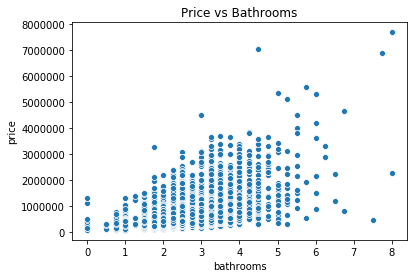

In [13]:
ax = sns.scatterplot(x="bathrooms", y="price", data=house_df)
plt.title("Price vs Bathrooms")

Text(0.5, 1.0, 'Price vs Square Feet apart from Basement')

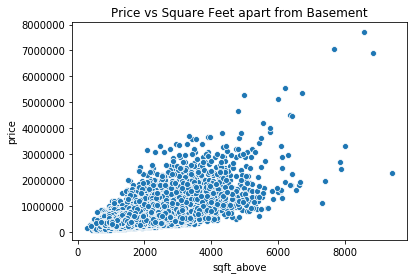

In [14]:
ax = sns.scatterplot(x="sqft_above", y="price", data=house_df)
plt.title("Price vs Square Feet apart from Basement")

Text(0.5, 1.0, 'Price vs Living room area in 2015(implies some renovations)')

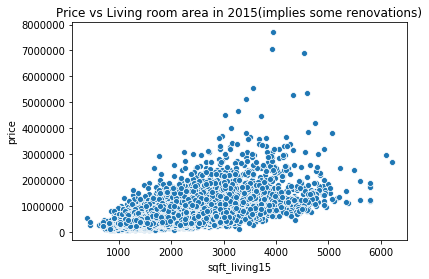

In [15]:
ax = sns.scatterplot(x="sqft_living15", y="price", data=house_df)
plt.title("Price vs Living room area in 2015(implies some renovations)")

Text(0.5, 1.0, 'Price vs Square footage of the Basement')

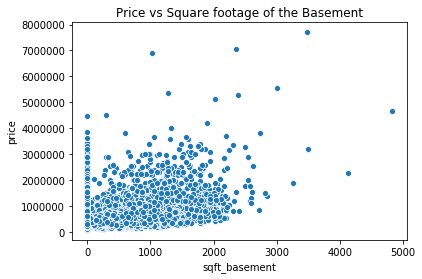

In [16]:
ax = sns.scatterplot(x="sqft_basement", y="price", data=house_df)
plt.title("Price vs Square footage of the Basement")

Text(0.5, 1.0, 'Price vs Has been viewed')

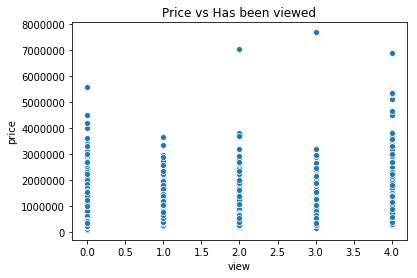

In [17]:
ax = sns.scatterplot(x="view", y="price", data=house_df)
plt.title("Price vs Has been viewed")

Text(0.5, 1.0, 'Which area has the costliest houses')

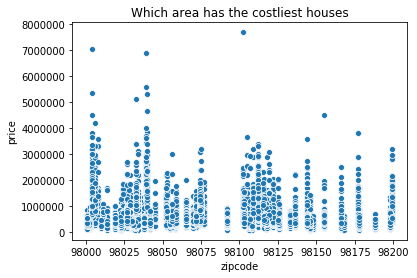

In [18]:
ax = sns.scatterplot(x="zipcode", y="price", data=house_df)
plt.title("Which area has the costliest houses")

#### From the above figures we can see that more the living area, more the price, though data is concentrated towards a particular price zone, but from the figure we can see that the data points seem to be in linear direction. Thanks to scatter plot we can also see some irregularities that the house with the highest square feet was sold for very less, maybe there is another factor or probably the data must be wrong. The location figure tells us about the location of the houses in terms of longitude and lattitude and it gives us quite an interesting observation that longitudes -122.2 to -122.4 sells houses at much higher amount, whereas houses within lattitudes 47.6 to 47.7 sell for a higher price. Subsequent figures indicate that higher the number of bedrooms and bathrooms, higher is the price of the house. Likewise, houses that have a higher grade assigned by the Kings County grading system have a igher price.

### Try to find out important features or create new features to improve the performance for your model.

#### We can do some data handling here. First, convert the id column to be the index of the data frame. Next, convert the date object to datatime. Finally, convert the data type for price, bathrooms and floors from float to int.

In [19]:
house_df['date'] = pd.to_datetime(house_df['date'])
house_df = house_df.set_index('id')
house_df.price = house_df.price.astype(int)
house_df.bathrooms = house_df.bathrooms.astype(int)
house_df.floors = house_df.floors.astype(int)
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### We can also create a column called house_age that is derived from the subtraction of date and yr_built. I will then drop the yr_built column and date column. Next, I will create a renovated column. If the yr_renovated column is a non-zero, I'll set a 1 to the renovated column. Then, I will drop the yr_renovated column.

In [20]:
house_df["house_age"] = house_df["date"].dt.year - house_df['yr_built']
house_df['renovated'] = house_df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

house_df=house_df.drop('date', axis=1)
house_df=house_df.drop('yr_renovated', axis=1)
house_df=house_df.drop('yr_built', axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


In [21]:
pd.set_option('precision', 2)
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,2.16e+04,21613.00,21613.00,21613.00,2.16e+04,21613.00,2.16e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,5.40e+05,3.37,1.75,2079.90,1.51e+04,1.45,7.54e-03,0.23,3.41,7.66,1788.39,291.51,98077.94,47.56,-122.21,1986.55,12768.46,43.32,0.04
std,3.67e+05,0.93,0.73,918.44,4.14e+04,0.55,8.65e-02,0.77,0.65,1.18,828.09,442.58,53.51,0.14,0.14,685.39,27304.18,29.38,0.20
min,7.50e+04,0.00,0.00,290.00,5.20e+02,1.00,0.00e+00,0.00,1.00,1.00,290.00,0.00,98001.00,47.16,-122.52,399.00,651.00,-1.00,0.00
25%,3.22e+05,3.00,1.00,1427.00,5.04e+03,1.00,0.00e+00,0.00,3.00,7.00,1190.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,18.00,0.00
50%,4.50e+05,3.00,2.00,1910.00,7.62e+03,1.00,0.00e+00,0.00,3.00,7.00,1560.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,40.00,0.00
75%,6.45e+05,4.00,2.00,2550.00,1.07e+04,2.00,0.00e+00,0.00,4.00,8.00,2210.00,560.00,98118.00,47.68,-122.12,2360.00,10083.00,63.00,0.00
max,7.70e+06,33.00,8.00,13540.00,1.65e+06,3.00,1.00e+00,4.00,5.00,13.00,9410.00,4820.00,98199.00,47.78,-121.31,6210.00,871200.00,115.00,1.00


### Insights

#### Looking at the bedrooms column we realize that the dataset has a house with 33 bedrooms, seems to be a massive house

#### Looking at the sqft_living column we realize that the maximum square feet is 13,450 where as the minimum is 290, we can see that the data is distributed

#### Looking at the floors column we realize that the dataset contains independent houses and not apartments /gated communities since the maximum number of floors is only 3.5 and minimum is 1

#### Looking at the yr_built column we can realize that the oldest house that was built was in the year 1900, it would be interesting to see the price of this house compared to the price of the house built most recently (in 2015)

### Picking out the relevant attributes for regression modelling
#### At this point we can pick out the attributes to build the regression modeling. We can use the method of identifying the top attributes that have direct correlations with the target variable. The target variable is 'price'. We can do this by building a correlation matrix. From the correlation matrix, we can pick the top 10 variables that have relationship with the target house price.

In [22]:
correlation = house_df.corr(method='pearson')
columns = correlation.nlargest(10, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

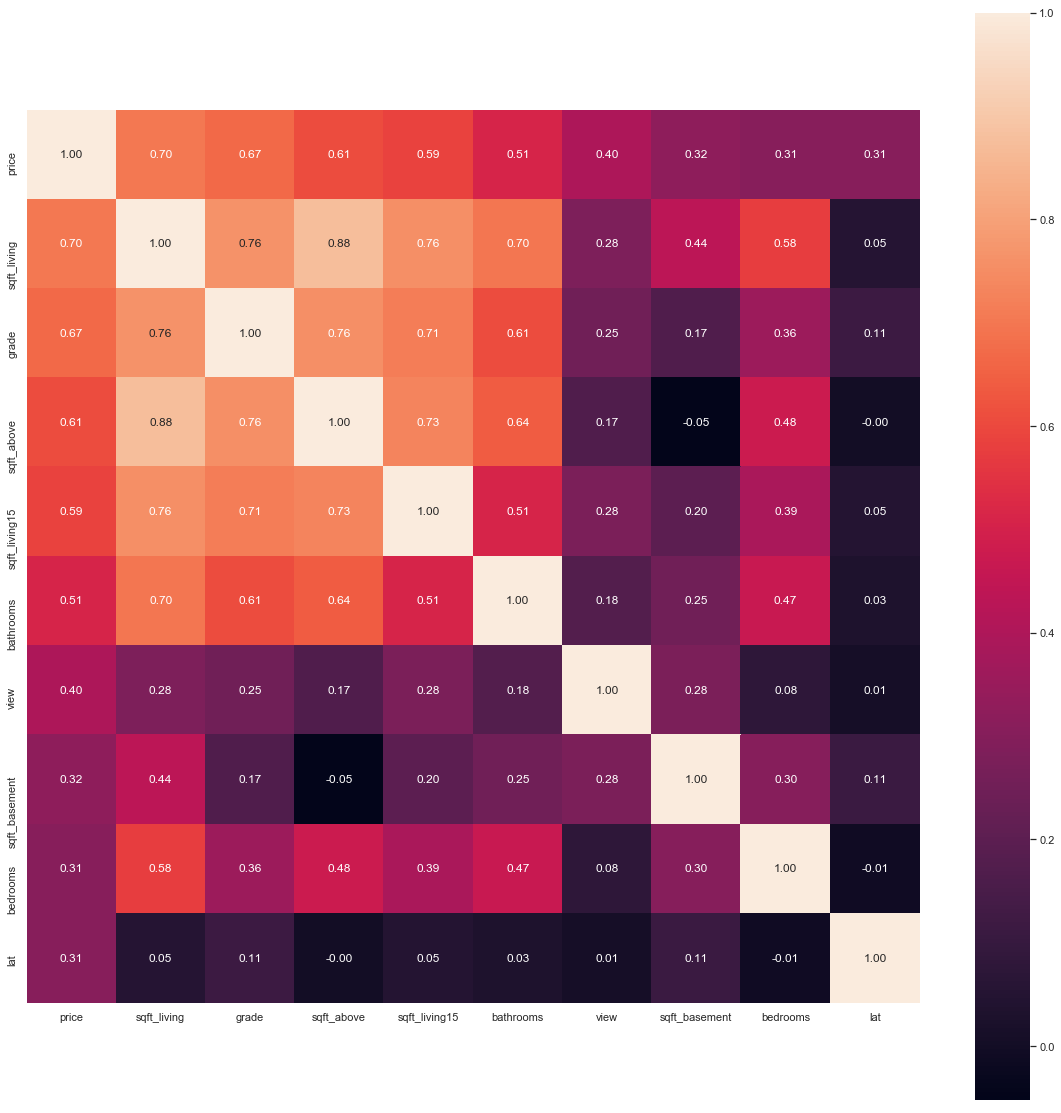

In [23]:
correlation_map = np.corrcoef(house_df[columns].values.T)
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', 
                      yticklabels=columns.values, xticklabels=columns.values, ax=ax)

plt.show()

#### From the earlier data.describe() output, we observed that the values of 2 variables - price and sqft_living - are large and will affect the absolute numbers of the regression model. To manage this, we can normalize the data using log.

In [24]:
house_df['price'] = np.log(house_df['price'])
house_df['sqft_living'] = np.log(house_df['sqft_living'])

### Baseline algorithm test
#### There are a few regression algorithms we can use. We can check the usable regression algorithms up and run them using a standard set of data. We can check the negative mean square error of each run. The given data set is broken down into training set and testing set. The test set is 30% of the provided data set.

In [25]:
X = house_df[columns]
y = X['price'].values
X = X.drop('price', axis = 1).values
#y = X['price']
#X = X.drop('price', axis = 1)

In [26]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Build a linear regression model to predict the house prices

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
reg.score(X_test, y_test)

0.7268986601126582

#### From the above r2 score of the Linear Regression model we can see that the score needs to be improved further to have better  prediction of the target variables, thus we will assess further which models can boost this performance

### Use appropriate cross validations techniques to find out the best predictor parameters and best prediction

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### The differing scales of the raw data may impact these algorithms. Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. We can implement standardisation using pipelines. We can then use cross-validation to validate performance of algorithms in totality.

In [30]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.073761 (0.003122)
ScaledLASSO: -0.275243 (0.009573)
ScaledEN: -0.275243 (0.009573)
ScaledKNN: -0.058014 (0.002653)
ScaledCART: -0.090099 (0.003664)
ScaledGBM: -0.045636 (0.002041)


#### From the output above, it looks like the Gradient Boosting Regressor operforms the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Gradient Boosting Regressor. The GBM will be tested with a few n_estimators using the GridSearchCV function.

In [31]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=42)
kfold = KFold(n_splits=10, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.047656 (0.002128) with: {'n_estimators': 50}
-0.045655 (0.002047) with: {'n_estimators': 100}
-0.044783 (0.002028) with: {'n_estimators': 200}
-0.044531 (0.002052) with: {'n_estimators': 300}
-0.044435 (0.002078) with: {'n_estimators': 400}
Best: -0.044435 using {'n_estimators': 400}


#### The best n_estimator configuration is 400 with the negative mean square error closest to 0

### Finalise and validate model
#### There's a need to standardise the training and test data before putting them through the GBR model.

In [32]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=42, n_estimators=400)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))
#model.score(rescaled_X_test, y_test)

0.046988674426158665


#### From the mean square error of 0.046 between the prediction outputs vs the test data, the GBR performed well. Important to note that the mean_square_error is calculated using the scaled data. It does not represent the error between the actual house prices and predicted prices. To better appreciate the outcome of the predictions we look at the raw predicted values and the corresponding test data.

In [33]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test})
compare_copy = compare.copy(deep = True)
compare.head(10)

,Prediction,Test Data
0,12.87,12.81
1,13.65,13.67
2,13.97,13.85
3,14.36,14.21
4,13.57,13.47
5,12.49,12.26
6,13.63,13.58
7,13.31,13.43
8,13.02,12.86
9,13.14,13.31


#### From the data frame output above, the difference between the predicted value and test data is pretty small. Take note that the data is scaled and log normalised. So, we have to inverse transform these data to see the actual values. 

In [34]:
actual_y_test = np.exp(y_test)
actual_predicted = np.exp(predictions)
diff = abs(actual_y_test - actual_predicted)

compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(5)

,Test Data,Predicted Price,Difference
0,365000,388315,23315
1,865000,847233,17766
2,1038000,1172432,134432
3,1490000,1728258,238258
4,710999,784202,73202
